In [1]:
using QuantumOptics
using SparseArrays
using Plots
using LinearAlgebra
using ProgressMeter
using Revise
includet("../Scripts/FirstBandApproximation.jl")
includet("../Scripts/ManyBody.jl")
includet("KM_Model.jl")

In [2]:
Nx = 4
Ny = 4
p = 1
q = 2
pn = 4
U = 1

N_Site = Nx*Ny
t = 1
NPhi0 = Int(Nx*Ny*(p/q))
PN = vcat( ( [i] for i in 0:pn) ... )
Cut_Off = NPhi0

8

In [3]:
matrix = KM(Nx, Ny, t, p, q)
H = Sp_Op(N_Site, matrix)
H_sp_Sub, Sub_Basis, P, Pt = H_sub(N_Site, H, Cut_Off)
H_MB = H_Kin_MB(Sub_Basis, PN, H_sp_Sub)
basis_cut_mb, basis_cut_sp = get_Bosonic_MB_Basis(Cut_Off, PN)
H_Total = H_Total_Sub(PN, P, Pt, basis_cut_mb, Cut_Off, U, H_MB);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


In [4]:
ϵ, λ = eigenstates(H_Total);

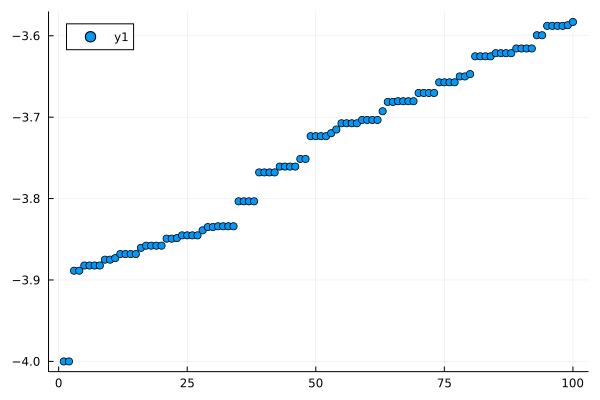

In [7]:
#ion()

scatter(ϵ[1:100])

#show()